# Cleaning of Cuyahoga County Data & Reporting of Results
----

#### Notes

#Site is Cenus.Gov


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time
from scipy.stats import linregress
from scipy.stats import ttest_ind

# Import API keys
from api_key import zip_key
from api_key import census_key
from pprint import pprint

### Pull in Data from stored CSV file. Look for reported zip codes without data. Remove ZIP codes without data.

#### Other Notes if needed.

In [2]:
# Retreive Census Data

input_data_file = "census_zip_cities.csv"
#cuy_cenus_df = pd.read_csv(input_data_file,index_col='Zip Code')
cuy_cenus_df = pd.read_csv(input_data_file)

cuy_cenus_df

,Zip Code,Census Geo ID,Zip Payroll,Zip Business Count,Zip Employee Count,Census Year
0,44017,8600000US44017,300812,506,9159,2000
1,44040,8600000US44040,21000,85,930,2000
2,44070,8600000US44070,444644,1132,17578,2000
3,44101,8600000US44101,39988,79,1201,2000
4,44102,8600000US44102,354759,765,11725,2000
...,...,...,...,...,...,...
972,44146,8610000US44146,917369,973,19065,2017
973,44147,8610000US44147,294525,506,6015,2017
974,44181,8610000US44181,3862,6,127,2017
975,44195,8610000US44195,0,31,0,2017


In [3]:
# Look for zip codes with no empoylee counts or payroll.

zip_code_payroll = cuy_cenus_df.groupby(["Zip Code"]).sum()["Zip Payroll"]
zip_employee_cnt = cuy_cenus_df.groupby(["Zip Code"]).sum()["Zip Employee Count"]
zip_check = zip_code_payroll + zip_employee_cnt

print(zip_check)

# Remove zip codes from data frame with no pertinent data

cuy_cenus_df = cuy_cenus_df.rename(columns = {'Zip Code': 'zip_code'})
cuy_cenus_df.set_index('zip_code', inplace= True)
cuy_census_new_df = cuy_cenus_df.drop([44190,44192,44193,44194])

cuy_census_new_df.reset_index(inplace= True)
cuy_census_new_df

Zip Code
44017     6623985
44040      501342
44070     9700015
44101      363788
44102     5705799
44103     6791811
44104     2534763
44105    11261542
44106    19107669
44107     7036514
44108     1089180
44109    10572408
44110     3100058
44111     8974949
44112     3269579
44113    18975783
44114    51841078
44115    30916338
44116     4388894
44117     6821927
44118     4646745
44119     2357346
44120     2013510
44121     2854281
44122    30544025
44123      978413
44124    20088901
44125    17043508
44126     1747344
44127     2335387
44128    10229678
44129     5762391
44130    22513104
44131    25700458
44132     2096705
44133     4442604
44134     3147483
44135    14014271
44136     9679299
44137     2348712
44138     1494438
44139    26177611
44140      902648
44142    10880068
44143    21498427
44144     8820105
44145    18347562
44146    16978886
44147     4050540
44181      121567
44190           0
44192           0
44193           0
44194           0
44195      172216
4

,zip_code,Census Geo ID,Zip Payroll,Zip Business Count,Zip Employee Count,Census Year
0,44017,8600000US44017,300812,506,9159,2000
1,44040,8600000US44040,21000,85,930,2000
2,44070,8600000US44070,444644,1132,17578,2000
3,44101,8600000US44101,39988,79,1201,2000
4,44102,8600000US44102,354759,765,11725,2000
...,...,...,...,...,...,...
931,44146,8610000US44146,917369,973,19065,2017
932,44147,8610000US44147,294525,506,6015,2017
933,44181,8610000US44181,3862,6,127,2017
934,44195,8610000US44195,0,31,0,2017


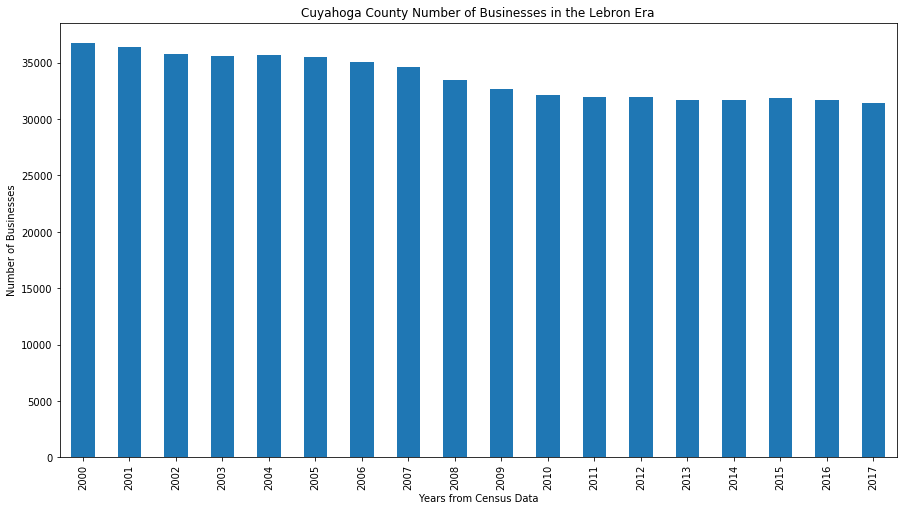

In [4]:
# Generate Stacked Bar Graphs for the number of businesses.
# Tabulate data by year
bus_year_total = cuy_census_new_df.groupby(["Census Year"]).sum()["Zip Business Count"]
employee_year_total = cuy_census_new_df.groupby(["Census Year"]).sum()["Zip Employee Count"]
payroll_year_total = cuy_census_new_df.groupby(["Census Year"]).sum()["Zip Payroll"]
payroll_year_avg = cuy_census_new_df.groupby(["Census Year"]).mean()["Zip Payroll"]

# Chart Data for "Cuyahoga County Number of Businesses in the Lebron Era"

chrt = bus_year_total.plot(kind="bar", figsize = (15,8))
chrt.set_xlabel("Years from Census Data")
chrt.set_ylabel("Number of Businesses")
chrt.set_title("Cuyahoga County Number of Businesses in the Lebron Era")

plt.show()


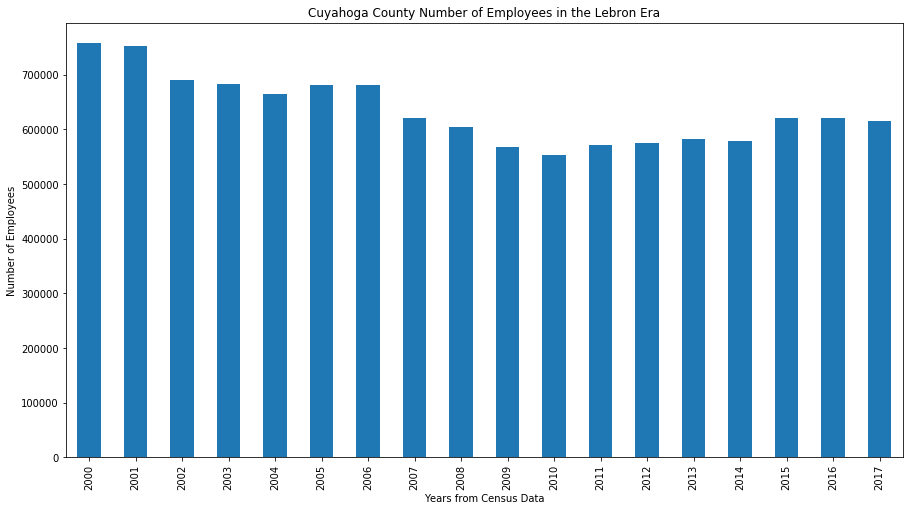

In [5]:
# Chart Data for "Cuyahoga County Number of Employees in the Lebron Era"

chrt = employee_year_total.plot(kind="bar", figsize = (15,8))
chrt.set_xlabel("Years from Census Data")
chrt.set_ylabel("Number of Employees")
chrt.set_title("Cuyahoga County Number of Employees in the Lebron Era")

plt.show()

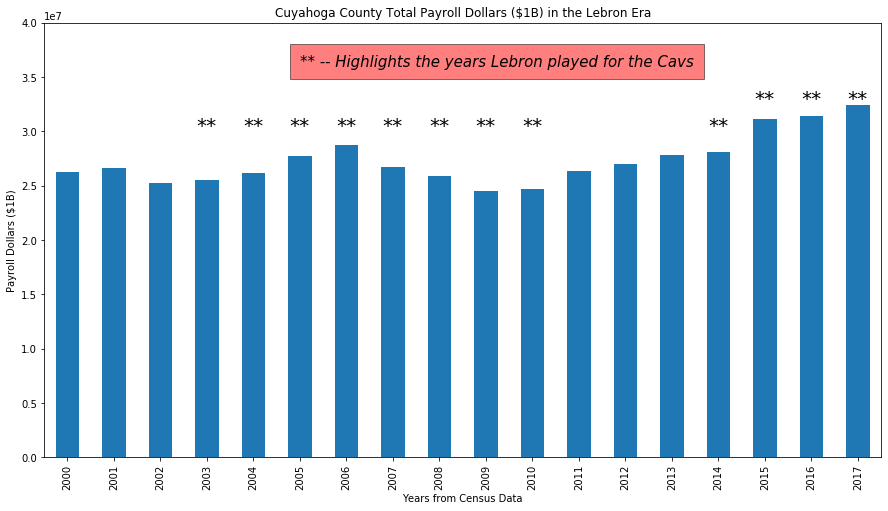

In [6]:
# Chart Data for "Cuyahoga County Total Payroll Dollars ($1000) in the Lebron Era"

chrt = payroll_year_total.plot(kind="bar", figsize = (15,8))

chrt.set_xlabel("Years from Census Data")
chrt.set_ylabel("Payroll Dollars ($1B)")
chrt.set_title("Cuyahoga County Total Payroll Dollars ($1B) in the Lebron Era")
chrt.set_ylim(0,40000000)
chrt.text(3, 30000000,'**', fontsize=20, horizontalalignment='center')
chrt.text(4, 30000000,'**', fontsize=20, horizontalalignment='center')
chrt.text(5, 30000000,'**', fontsize=20, horizontalalignment='center')
chrt.text(6, 30000000,'**', fontsize=20, horizontalalignment='center')
chrt.text(7, 30000000,'**', fontsize=20, horizontalalignment='center')
chrt.text(8, 30000000,'**', fontsize=20, horizontalalignment='center')
chrt.text(9, 30000000,'**', fontsize=20, horizontalalignment='center')
chrt.text(10, 30000000,'**', fontsize=20, horizontalalignment='center')
chrt.text(14, 30000000,'**', fontsize=20, horizontalalignment='center')
chrt.text(15, 32500000,'**', fontsize=20, horizontalalignment='center')
chrt.text(16, 32500000,'**', fontsize=20, horizontalalignment='center')
chrt.text(17, 32500000,'**', fontsize=20, horizontalalignment='center')
chrt.text(5, 36000000, '** -- Highlights the years Lebron played for the Cavs', style='italic', fontsize=15,
        bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 10})

plt.show()

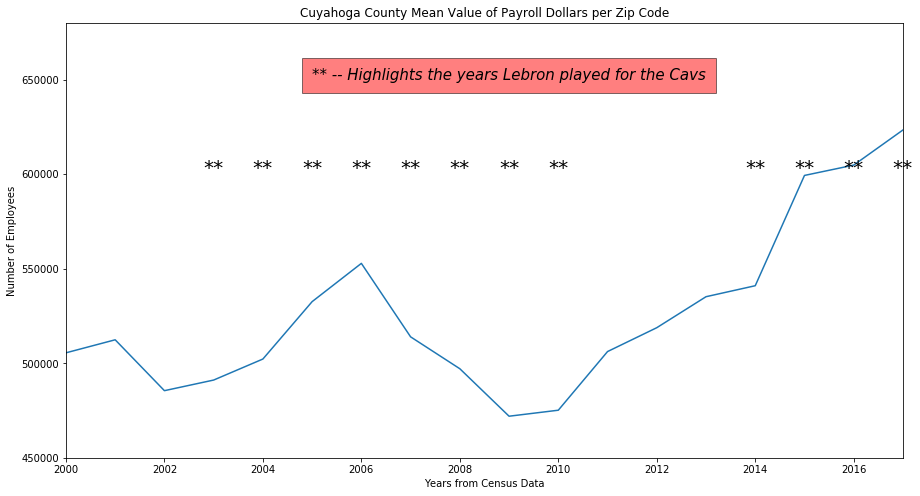

In [7]:
chrt = payroll_year_avg.plot(kind="line", figsize = (15,8))
chrt.set_xlim(2000,2017)
chrt.set_ylim(450000,680000)
chrt.set_xlabel("Years from Census Data")
chrt.set_ylabel("Number of Employees")
chrt.set_title("Cuyahoga County Mean Value of Payroll Dollars per Zip Code")
chrt.text(2003, 600000,'**', fontsize=20, horizontalalignment='center')
chrt.text(2004, 600000,'**', fontsize=20, horizontalalignment='center')
chrt.text(2005, 600000,'**', fontsize=20, horizontalalignment='center')
chrt.text(2006, 600000,'**', fontsize=20, horizontalalignment='center')
chrt.text(2007, 600000,'**', fontsize=20, horizontalalignment='center')
chrt.text(2008, 600000,'**', fontsize=20, horizontalalignment='center')
chrt.text(2009, 600000,'**', fontsize=20, horizontalalignment='center')
chrt.text(2010, 600000,'**', fontsize=20, horizontalalignment='center')
chrt.text(2014, 600000,'**', fontsize=20, horizontalalignment='center')
chrt.text(2015, 600000,'**', fontsize=20, horizontalalignment='center')
chrt.text(2016, 600000,'**', fontsize=20, horizontalalignment='center')
chrt.text(2017, 600000,'**', fontsize=20, horizontalalignment='center')
chrt.text(2005, 650000, '** -- Highlights the years Lebron played for the Cavs', style='italic', fontsize=15,
        bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 10})
plt.show()

In [8]:
payroll_year_avg

Census Year
2000    505524.288462
2001    512411.500000
2002    485504.730769
2003    491117.384615
2004    502239.230769
2005    532592.153846
2006    552831.942308
2007    513973.500000
2008    497102.384615
2009    471994.461538
2010    475168.826923
2011    506186.769231
2012    518808.057692
2013    535196.576923
2014    541009.519231
2015    599339.000000
2016    604799.153846
2017    623378.884615
Name: Zip Payroll, dtype: float64

In [9]:
lebron_not_in_cle = payroll_year_avg[[2000,2001,2002,2011,2012,2013]]
lebron_in_cle = payroll_year_avg[[2003,2004,2005,2006,2007,2008,2009,2010,2014,2015,2016,2017]]
ttest_results = ttest_ind(lebron_in_cle, lebron_not_in_cle)

In [10]:
print(ttest_results)
print("")
print("*** pvalue is greater than 0.05 ***")
print("Since the pvalue is greater than 0.05, there is not evidence to support that Lebron had a direct impact on")
print("Cuyahoga Counties total payroll for the years he played in Cleveland!")

Ttest_indResult(statistic=1.0546770526142426, pvalue=0.3072397587580739)

*** pvalue is greater than 0.05 ***
Since the pvalue is greater than 0.05, there is not evidence to support that Lebron had a direct impact on
Cuyahoga Counties total payroll for the years he played in Cleveland!
